In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

In [46]:
df = pd.read_csv('./data/processed/cleaned_stocks.csv', parse_dates=['date'])
symbol = 'AMZN'

stock_df = df[df['symbol'] == symbol].copy()
stock_df.set_index('date', inplace=True)
stock_df = stock_df.resample('D').ffill()
stock_df.head()

,open,high,low,close,volume,symbol,daily_return
date,,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,NaN
2013-02-09,261.40,265.25,260.555,261.95,3879078,AMZN,NaN
2013-02-10,261.40,265.25,260.555,261.95,3879078,AMZN,NaN
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-0.018095
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,0.005793


In [ ]:
# visulaizing time series in 'AMZN'

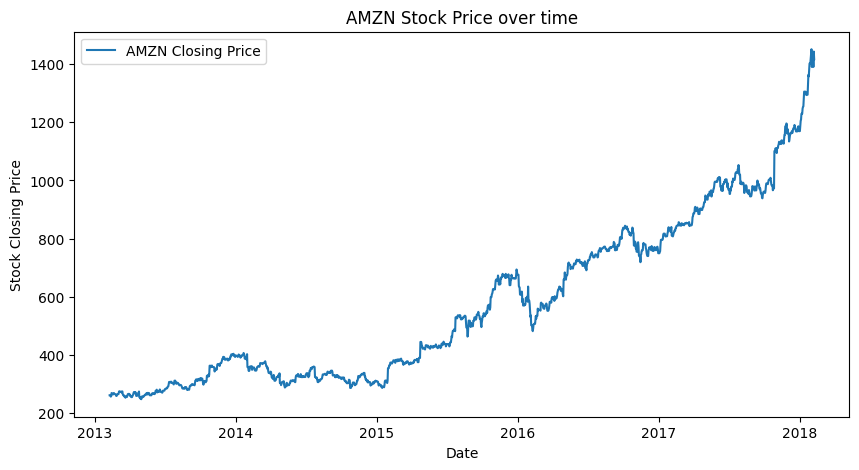

In [47]:
plt.figure(figsize=(10,5))
plt.plot(stock_df['close'], label = f'{symbol} Closing Price')
plt.title(f'{symbol} Stock Price over time')
plt.xlabel('Date')
plt.ylabel('Stock Closing Price')
plt.grid(False)
plt.legend()
plt.show()

In [2]:
# ###ARIMA Forecasting model: 
# ARIMA, which stands for Autoregressive Integrated Moving Average, is a popular statistical model used for time series forecasting.
# Here's a breakdown of what each component means:
# Autoregressive (AR): This component refers to the model that uses past values of the variable being forecasted to predict future values. The "p" parameter in ARIMA(p, d, q) represents the number of lagged observations included in the model.

# Integrated (I): This component indicates the differencing of raw observations (subtracting an observation from an observation at the previous time step) to make the time series stationary. The "d" parameter in ARIMA(p, d, q) represents the number of times that differencing is applied to the series.

# Moving Average (MA): This component incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations. The "q" parameter in ARIMA(p, d, q) specifies the size of the moving average window.

# ARIMA models are effective when the time series exhibits patterns that can be explained by its own past values (autoregressive behavior), requires differencing to become stationary, and shows residual dependencies that can be modeled by a moving average process. These models are widely used in various fields such as economics, finance, and environmental science for forecasting future values based on historical data patterns.

In [48]:
model= ARIMA(stock_df['close'], order=(5,1,0)) #(p,d,q)
model_fit = model.fit()
forecast = model_fit.forecast(steps=249)
# future date index
last_date = stock_df.index[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1,250)]
forecast_df = pd.DataFrame({'date': future_dates, 'forecast': forecast})
forecast_df.set_index('date',inplace=True)

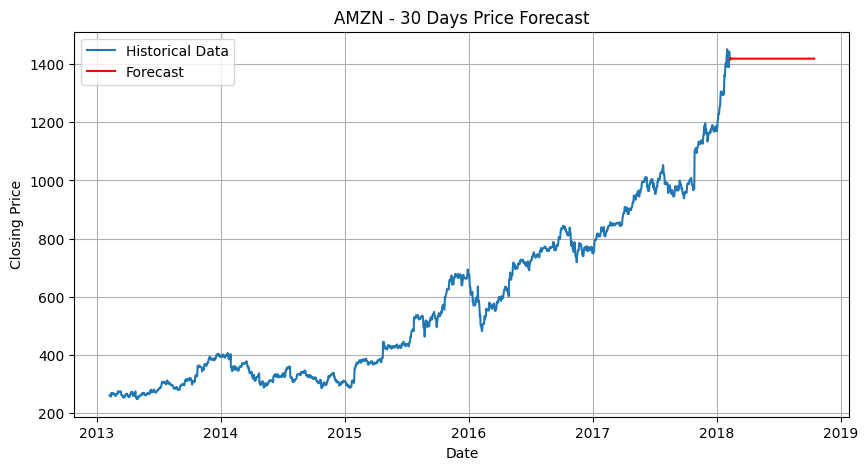

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(10,5))
plt.plot(stock_df['close'], label = 'Historical Data')
plt.plot(forecast_df['forecast'], label='Forecast', color='red')
plt.title(f'{symbol} - 30 Days Price Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('../reports/visuals/amzn_forecast_30.png')

In [25]:
# saving dataset
forecast_df.to_csv('./data/processed/amzn_forecast.csv')